In [65]:
import pandas as pd

churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [66]:
churn_data.drop(labels = 'RowNumber', axis=1)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [102]:
import plotly
import plotly.express as px

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

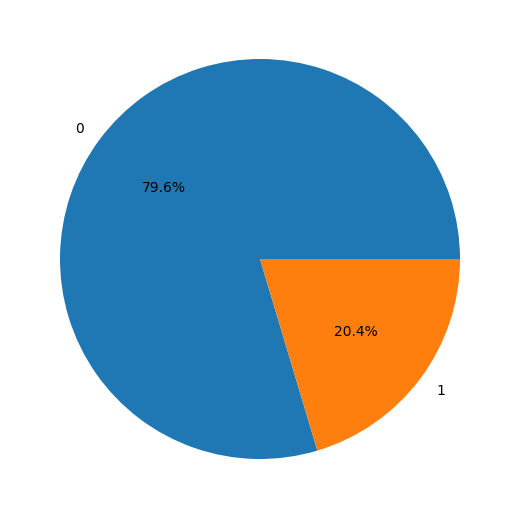

In [68]:
loyal_clients = churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    loyal_clients,
    labels=loyal_clients.index,
    autopct='%.1f%%',
);

1. Количество лояльных клиентов в 4 раза превышает количество ушедших клиентов.

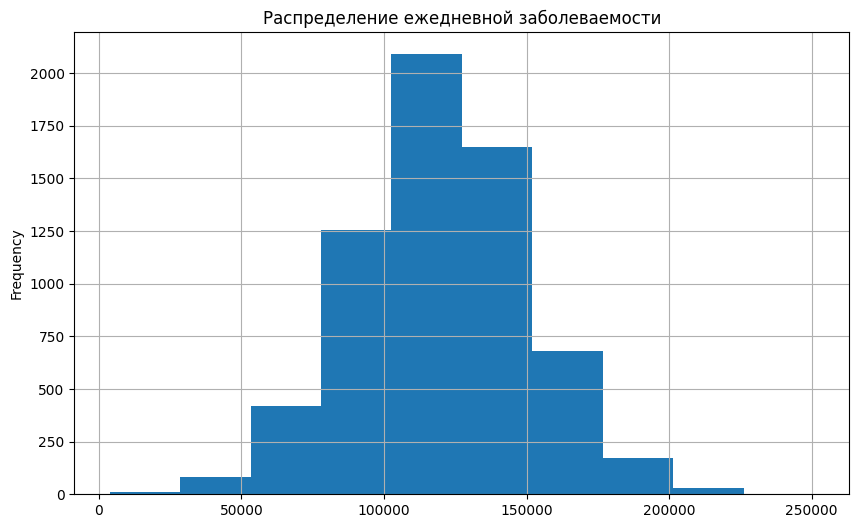

In [69]:
bal_2500 = churn_data[churn_data['Balance'] > 2500]['Balance']
bal_2500.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    bins=10
);

2. Среди пользователей с балансом свыше 2500 долларов наибольшее число пользователей имеет баланс от 100 до 125 тыс. Максимальный остаток составляет около 225 тыс. долларов.

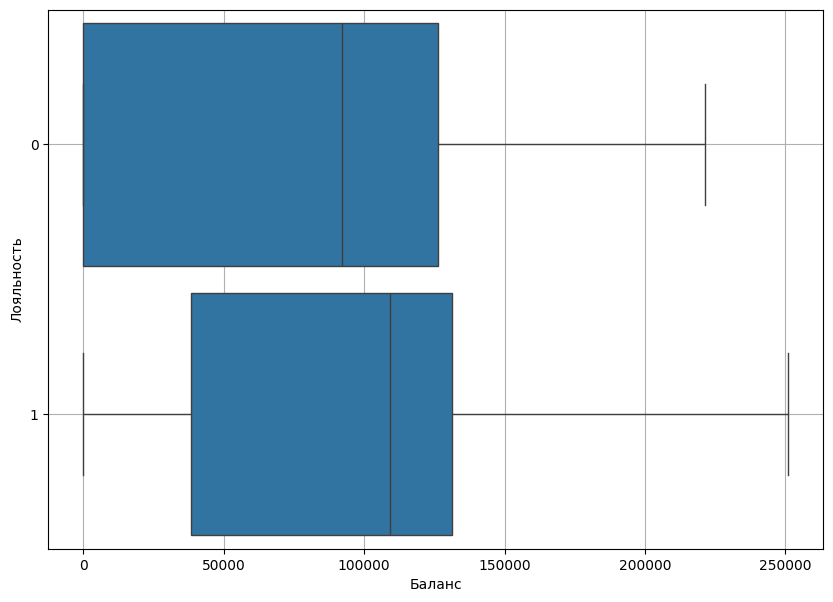

In [70]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.9
)
boxplot.set_xlabel('Баланс');
boxplot.set_ylabel('Лояльность');
boxplot.grid()

3. Нелояльные клиенты держат на накопительном счете большие суммы. Возможно они использовали счета для накоплений и сменили банк при получении более выгодных условий. Лояльные клиенты используют счета для текущих операций. ВОзможно их устраивает качество сервиса и им не так важен уровень процентной ставки

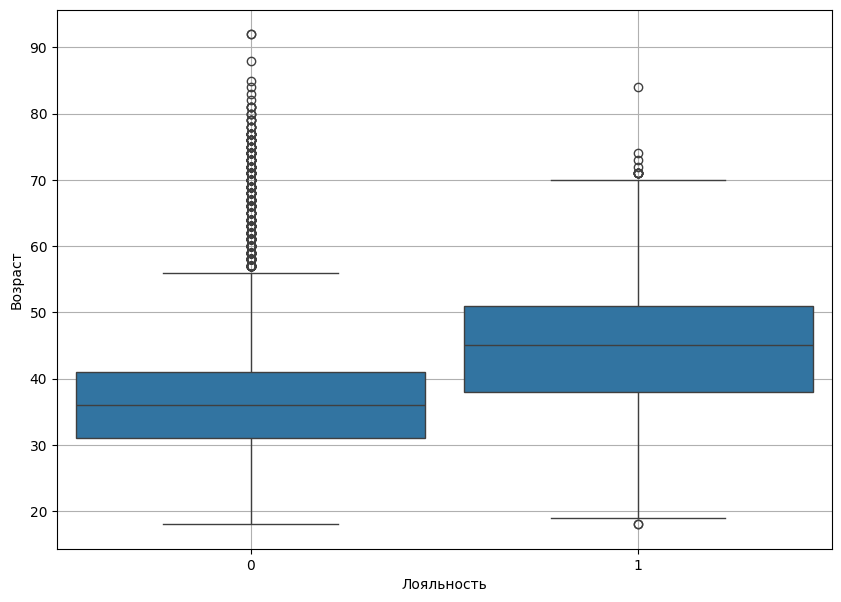

In [71]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_data,
    y='Age',
    x='Exited',
    orient='v',
    width=0.9
)
boxplot.set_xlabel('Лояльность');
boxplot.set_ylabel('Возраст');
boxplot.grid()

4. Средний возраст лояльных клиетов ниже. Больше потенциальных выбросов в группе лояльных клиентов. Банку стоит обратить внимание на возрастных клиентов, понять причину их ухода.

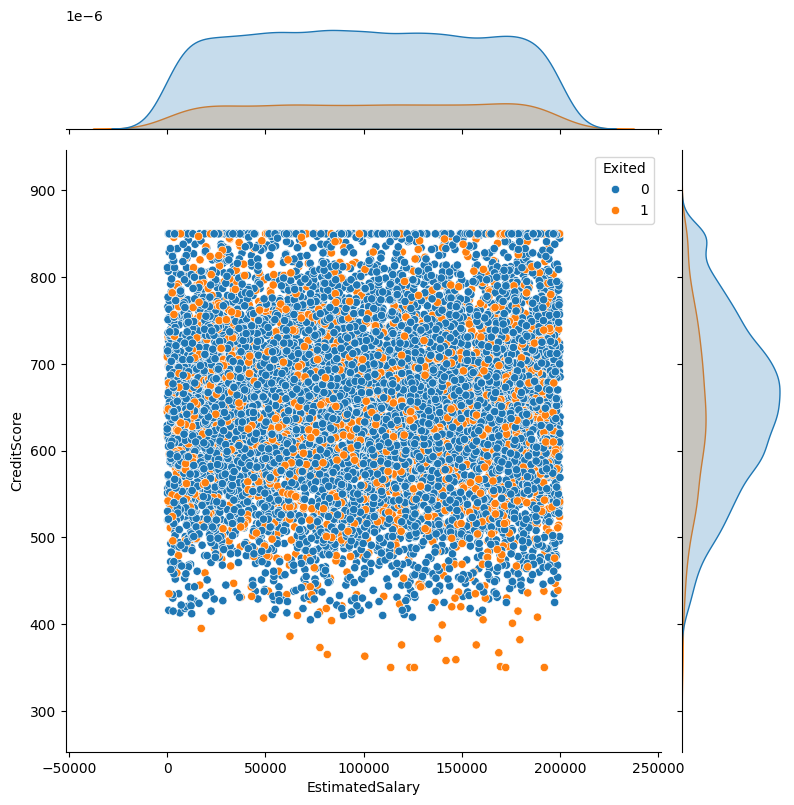

In [72]:
jointplot = sns.jointplot(
    data=churn_data, 
    x='EstimatedSalary', 
    y='CreditScore',
    hue='Exited',
    height=8,
)

5. Зависимость между кредитным рейтингом клиента и предполагаемой зарплатой не наблюдается.

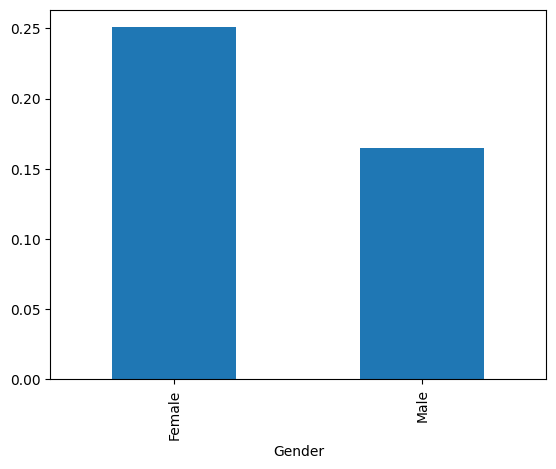

In [73]:
men_women = churn_data.groupby(['Gender'])['Exited'].mean().plot(kind='bar');

6. Женщины уходят чаще чем мужчины

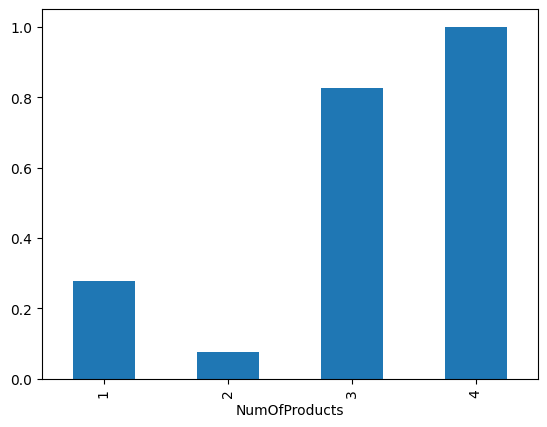

In [111]:
Loyal_prod = churn_data.groupby(['NumOfProducts'])['Exited'].mean().plot(kind='bar');

7. Наиболее лояльные клиенты с 2 продуктами. Далее при увеличении количества услуг банка, которые приобрёл клиент, лояльность снижается до нуля.

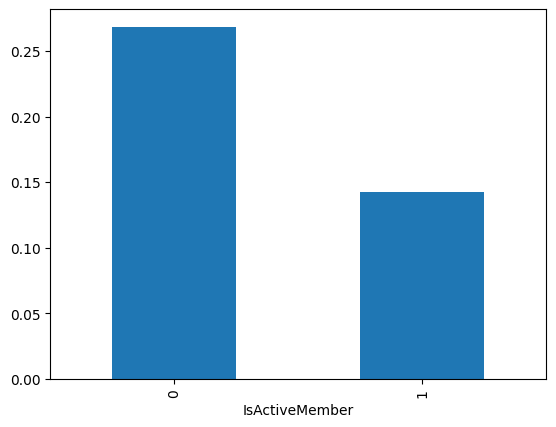

In [77]:
active = churn_data.groupby(['IsActiveMember'])['Exited'].mean().plot(kind='bar');

8. Статус активного клиента снижает вероятность ухода. Можно провести акцию (спецпредложение) для неактивных клиентов

In [94]:
heat_data = churn_data.groupby('Geography', as_index=False)['Exited'].mean()

In [95]:
fig = px.choropleth(
    data_frame=heat_data, #DataFrame
    locations="Geography", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="Exited", #от чего зависит цвет
    range_color=[0, 1], #диапазон цвета
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds', #палитра цветов
    )
fig.show()

9. Доля ушедших клиентов выше в Германии. Возможно в этом регионе выше конкуренция.

In [91]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [101]:
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

pivot = churn_data.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat',
    aggfunc='mean'
)

pivot

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


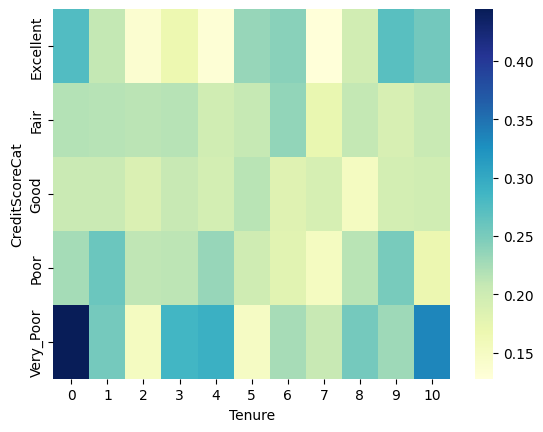

In [103]:
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')

10. Чаще всего уходят клиенты с очень низким кредитным рейтингом